Baisc Implementation

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [2]:
transform = transforms.ToTensor()

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True
)


100%|██████████| 9.91M/9.91M [00:01<00:00, 5.06MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 133kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.26MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.14MB/s]


In [3]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [4]:
model = Autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [5]:
num_epochs = 10

for epoch in range(num_epochs):
    for data, _ in train_loader:

        data = data.view(data.size(0), -1)

        output = model(data)
        loss = criterion(output, data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.0244
Epoch [2/10], Loss: 0.0149
Epoch [3/10], Loss: 0.0118
Epoch [4/10], Loss: 0.0101
Epoch [5/10], Loss: 0.0095
Epoch [6/10], Loss: 0.0089
Epoch [7/10], Loss: 0.0077
Epoch [8/10], Loss: 0.0068
Epoch [9/10], Loss: 0.0073
Epoch [10/10], Loss: 0.0070


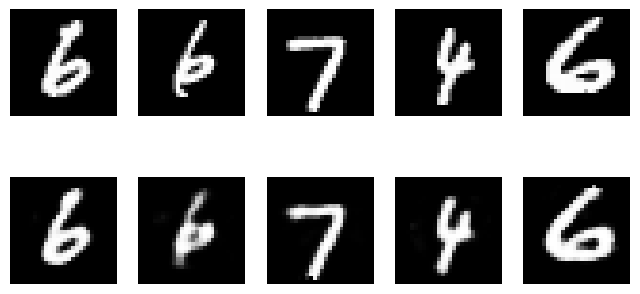

In [6]:
dataiter = iter(train_loader)
images, _ = next(dataiter)

images_flat = images.view(images.size(0), -1)
outputs = model(images_flat)

images = images.numpy()
outputs = outputs.detach().numpy()

plt.figure(figsize=(8,4))

for i in range(5):
    # Original
    plt.subplot(2,5,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2,5,i+6)
    plt.imshow(outputs[i].reshape(28,28), cmap='gray')
    plt.axis('off')

plt.show()


Full Implementation

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [8]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=128,
    shuffle=True
)


In [9]:
class CNNAutoencoder(nn.Module):
    def __init__(self):
        super(CNNAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, 3, stride=2, padding=1),
            nn.ReLU()
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [10]:
model = CNNAutoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [11]:
epochs = 15

for epoch in range(epochs):
    for img, _ in train_loader:

        output = model(img)
        loss = criterion(output, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [1/15], Loss: 0.0028
Epoch [2/15], Loss: 0.0013
Epoch [3/15], Loss: 0.0010
Epoch [4/15], Loss: 0.0009
Epoch [5/15], Loss: 0.0007
Epoch [6/15], Loss: 0.0006
Epoch [7/15], Loss: 0.0005
Epoch [8/15], Loss: 0.0005
Epoch [9/15], Loss: 0.0005
Epoch [10/15], Loss: 0.0004
Epoch [11/15], Loss: 0.0004
Epoch [12/15], Loss: 0.0004
Epoch [13/15], Loss: 0.0004
Epoch [14/15], Loss: 0.0004
Epoch [15/15], Loss: 0.0003


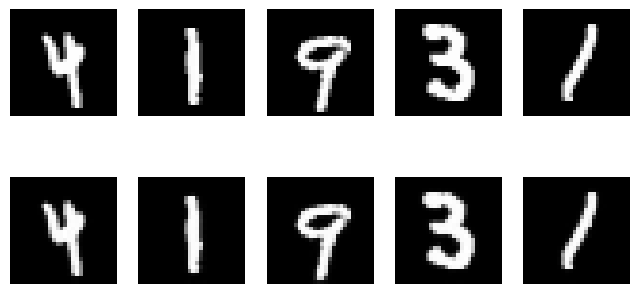

In [12]:
dataiter = iter(train_loader)
images, _ = next(dataiter)

outputs = model(images)

images = images.numpy()
outputs = outputs.detach().numpy()

plt.figure(figsize=(8,4))

for i in range(5):
    # Original
    plt.subplot(2,5,i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2,5,i+6)
    plt.imshow(outputs[i][0], cmap='gray')
    plt.axis('off')

plt.show()
